In [1]:
import argparse
import json
import os
import time
import copy
import warnings
import numpy as np
import sys


from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

# Training settings
# explore this:
# from eval_gcn import ensemble_performance
# !!!

from deeplim.training import evaluate, train_epoch, train_epoch_LIM, get_dataloaders, evaluate_LIM

from deeplim.GCN.GCN_model import GCN
from deeplim.DLIM.deeplim_model import nlim
from utilities.utils import set_gpu, set_seed
from utilities.model_logging import update_tqdm, save_model
from utilities.optimization import get_optimizer, get_loss
import matplotlib.pyplot as plt
import torch

/glade/work/wchapman/miniconda3/envs/gputorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings("ignore")  # or use: "once"

Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9758364882231635
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9761589482784918
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9738570428118536
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9752227677879253


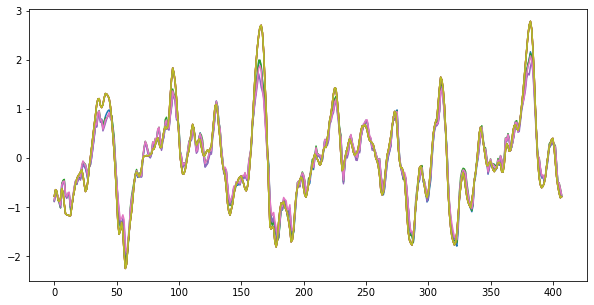

===========+++++=============
final ensemble corr for horizon:  1   0.9757974803360506
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9493708787780353
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.94919988533511
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9508118628596043
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9425690034023367


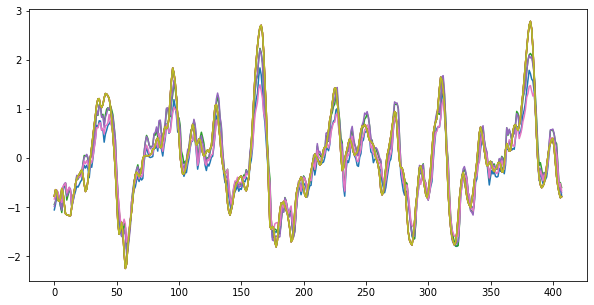

===========+++++=============
final ensemble corr for horizon:  2   0.9495177021123273
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9208176357664001
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9091370242242688
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9183075436845359
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.9123466358655499


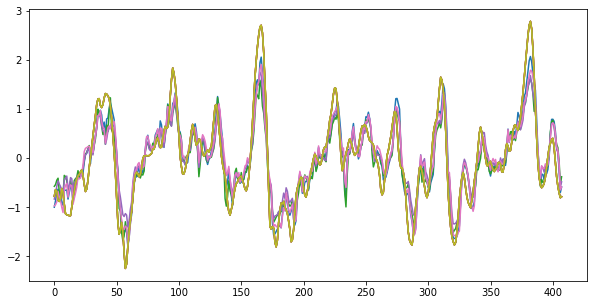

===========+++++=============
final ensemble corr for horizon:  3   0.9195837923382023
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8685703899560505
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8695330733885833
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8766897896121251
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8689786077451672


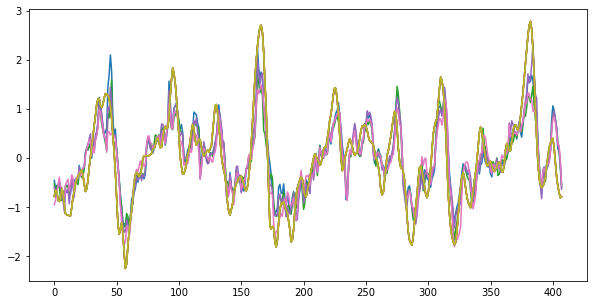

===========+++++=============
final ensemble corr for horizon:  4   0.8822300334770374
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8221635524844043
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8194283803996196
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8361701770092861
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.8290342276641871


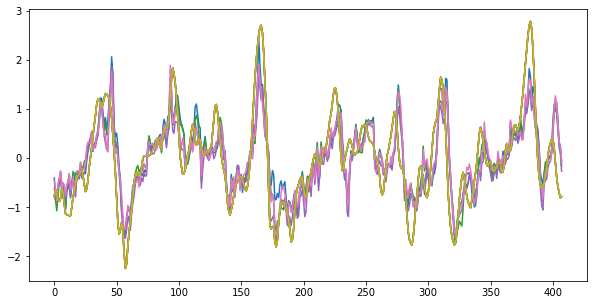

===========+++++=============
final ensemble corr for horizon:  5   0.8354692826866199
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.7415440785937862
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.7906479042070441
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.7841264318622377
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.7631734220467555


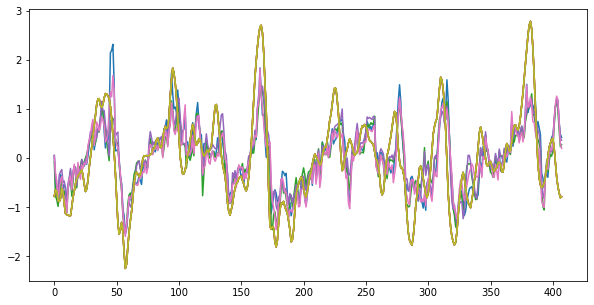

===========+++++=============
final ensemble corr for horizon:  6   0.7890213348714609
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.6428781854236103
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.6948480588256473
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.6900568386519359
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.7032839160354765


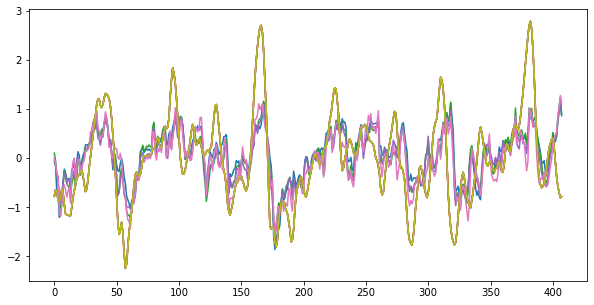

===========+++++=============
final ensemble corr for horizon:  9   0.6969873511218561
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.5137489755530734
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.510975363790564
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.46381778354634084
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.47416363252538857


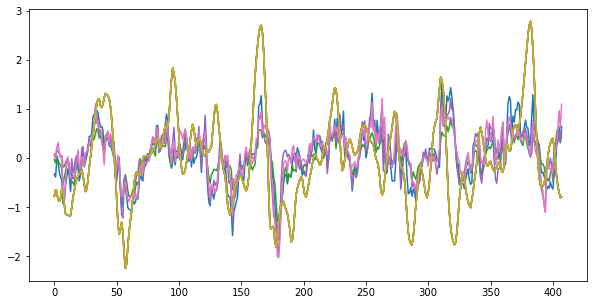

===========+++++=============
final ensemble corr for horizon:  12   0.5100996865769589
===========+++++=============
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.17802860625531397
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.29150317188196867
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.28519994370450275
Train set: 36132 Validation set 600 Test set 408
[GraphConvolution (6 -> 250), GraphConvolution (250 -> 100)]
0.27480271000579287


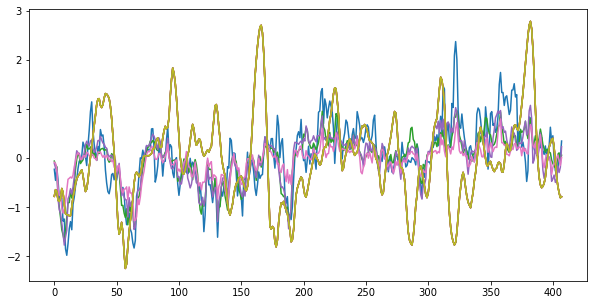

===========+++++=============
final ensemble corr for horizon:  23   0.2636945281719768
===========+++++=============


In [6]:
#load config files
config_files = ['config_bias']
ID = str(time.strftime('%Hh%Mm%Ss_on_%b_%d_%Y'))
for i, config_file in enumerate(config_files):
    with open(f'configs/DLIM_{config_file}.json', 'r') as f:
        config = json.load(f)
    params, net_params = config['params'], config['net_params']
#load model
for horizon in [1,2,3,4,5,6,9,12,23]:
    plt.figure(figsize=(10,5))    
    ts=np.zeros([4,408])
    for seed in range(1,5):
        params['horizon']=horizon
        params['epochs']=30
        (adj, static_feats, _), (trainloader,valloader,testloader) = get_dataloaders(params, net_params)
        static_feats = static_feats[:,2:]
        static_feats = np.concatenate([static_feats[:,:int(static_feats.shape[1]/2)],static_feats[:,int(static_feats.shape[1]/2):]])
        outsize=1
        model = nlim(net_params, params,static_feat=static_feats, adj=adj,outsize=outsize,device='cpu')
        outbase_dir = 'out/'+str(params['horizon'])+'lead/'
        out_mod_dir = outbase_dir+'/'+config_file+'/'
        mod_name =out_mod_dir+'/LIM'+'_numeofs_' + f'{net_params["num_eofs"]:03}'+'_seed_' + f'{seed:03}'+'_optimizer_'+params["optimizer"]+'_loss_'+params["loss"]+'_epochs_'+f'{params["epochs"]:03}'+'.pth'
        bb = torch.load(mod_name,map_location=torch.device('cpu'))
        model.load_state_dict(bb['model_state_dict'])
        _, val_stats,truer,preder = evaluate_LIM(testloader,model, device='cpu',return_preds=True)
        plt.plot(preder[0:])
        plt.plot(truer[0:])
        print(np.corrcoef(preder[0:400],truer[0:400])[0,1])
        ts[seed-1,:]=preder
    plt.plot(truer[0:])
    plt.show()
    print('===========+++++=============')
    print('final ensemble corr for horizon: ',params['horizon'],' ',np.corrcoef(np.mean(ts,axis=0)[0:400],truer[0:400])[0,1])
    print('===========+++++=============')


In [10]:
testloader

In [12]:
import xarray as xr

In [16]:
xr.open_dataset(os.getcwd()+'/Data/GODAS/GODAS.input.36mn.1980_2015.nc')

<xarray.Dataset>
Dimensions:  (lat: 24, lev: 36, lon: 72, time: 36)
Coordinates:
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float64 -55.0 -50.0 -45.0 -40.0 -35.0 ... 45.0 50.0 55.0 60.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 32.0 33.0 34.0 35.0 36.0
  * time     (time) datetime64[ns] 1980-01-01 1981-01-01 ... 2015-01-01
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    t300     (time, lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.3 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Fri Jan 18 17:52:45 2019: cdo -f nc import_binary set/godas...
    CDO:          Climate Data Operators version 1.6.3 (http://code.zmaw.de/p...

In [14]:
os.getcwd()

'/glade/work/wchapman/DeepLIM'